In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Create a CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data Augmentation
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and prepare the dataset
train_generator = train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/capstone project',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

# Train the model
model.fit(train_generator, epochs=epochs)

# Save the model
model.save('stock_candle_ai_model.h5')

Found 16 images belonging to 2 classes.
Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6958 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 1.6800 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.7067 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 0.6936 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.6936 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.6905 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.6959 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 2s 2s/step - loss: 0.6764 - accuracy: 0.6875
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 0.6705 - accuracy: 0.6250
Epoch 10/20
1/1 [==============================] - 2s 2s/step - loss: 0.6762 - accuracy: 0.5625
Epoch 11/

1/1 [==============================] - 0s 107ms/step


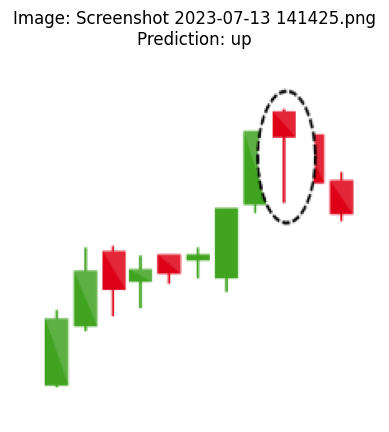

1/1 [==============================] - 0s 76ms/step


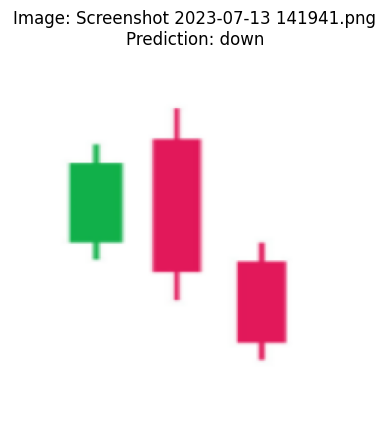

1/1 [==============================] - 0s 79ms/step


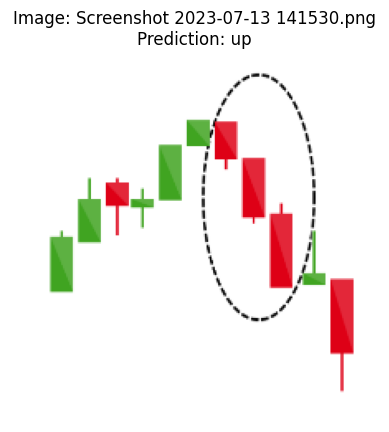

1/1 [==============================] - 0s 84ms/step


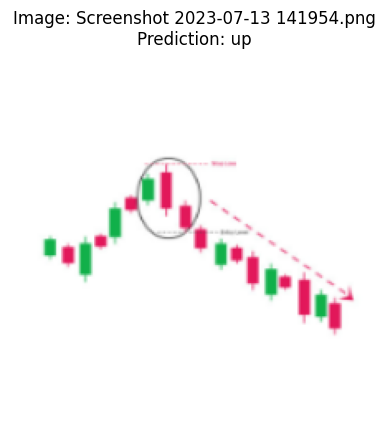

1/1 [==============================] - 0s 80ms/step


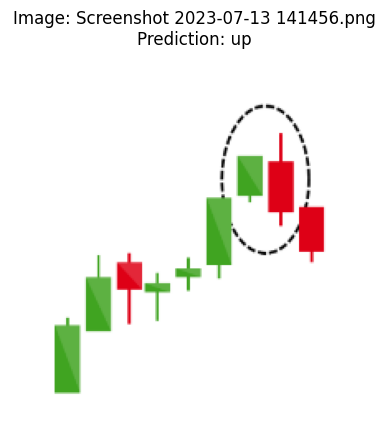

1/1 [==============================] - 0s 78ms/step


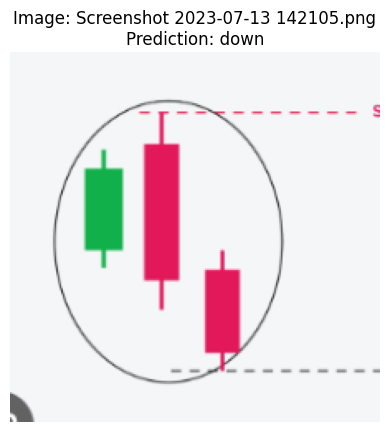

1/1 [==============================] - 0s 79ms/step


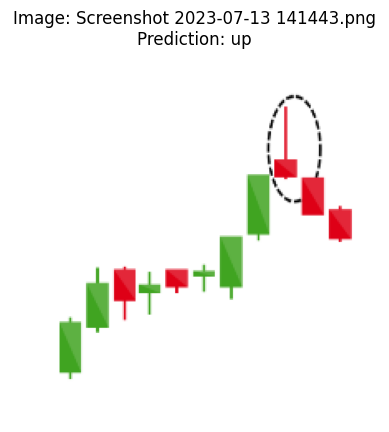

1/1 [==============================] - 0s 48ms/step


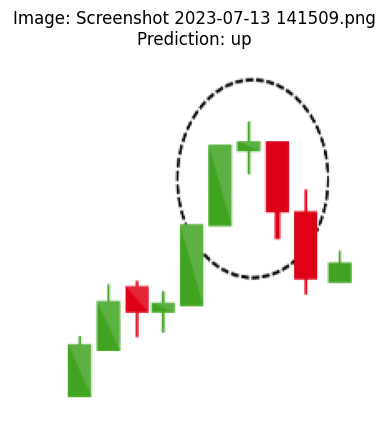

1/1 [==============================] - 0s 58ms/step


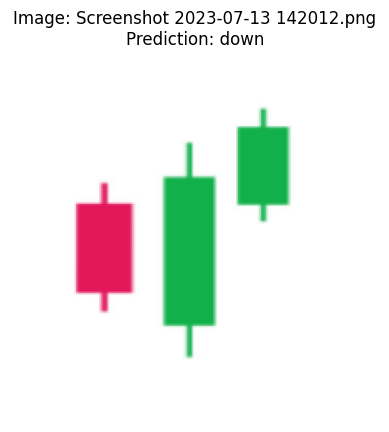

1/1 [==============================] - 0s 47ms/step


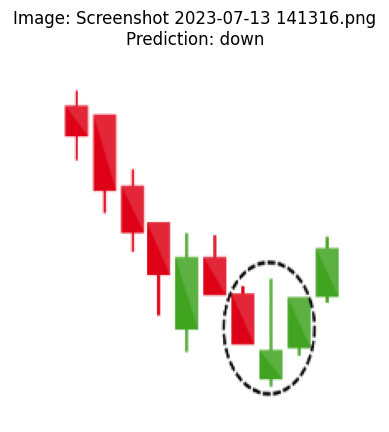

1/1 [==============================] - 0s 48ms/step


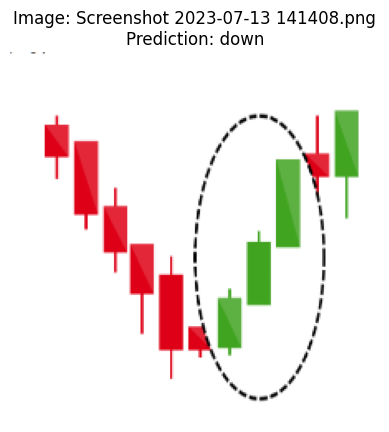

1/1 [==============================] - 0s 48ms/step


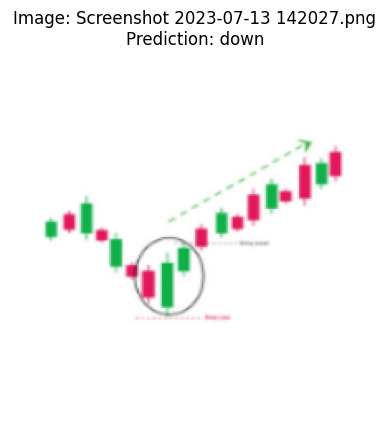

1/1 [==============================] - 0s 47ms/step


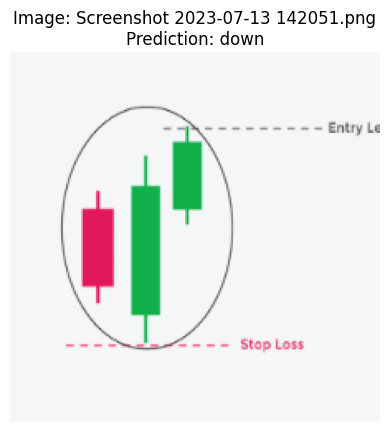

1/1 [==============================] - 0s 62ms/step


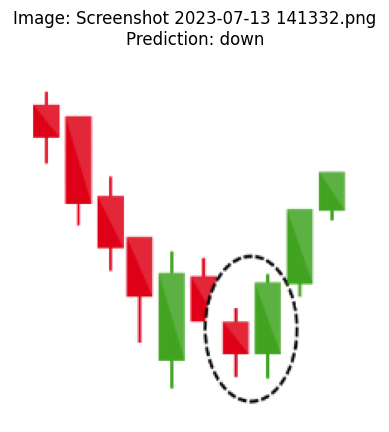

1/1 [==============================] - 0s 56ms/step


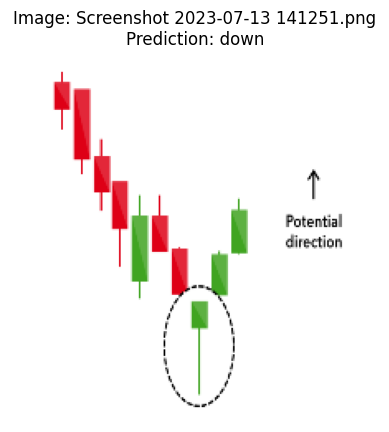

1/1 [==============================] - 0s 50ms/step


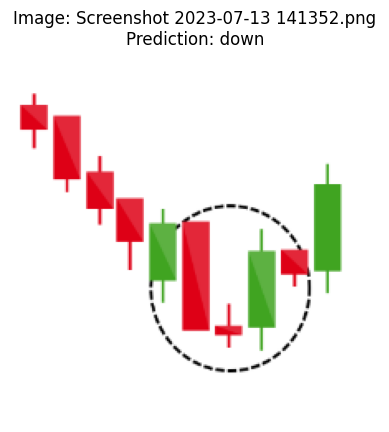

In [10]:
import os
import cv2
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('stock_candle_ai_model.h5')  # Load your model file

# Define the path to the input images directory
input_directory = '/content/drive/MyDrive/input'  # Replace with the path to your "input" directory

# List the files in the input directory
input_images = os.listdir(input_directory)

# Iterate through the input images
for image_file in input_images:
    image_path = os.path.join(input_directory, image_file)

    # Read and preprocess the input image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Adjust the size to match your model input size
    img = np.expand_dims(img, axis=0)  # Add a batch dimension

    # Predict using the model
    prediction = model.predict(img)

    # Classify as "up" or "down" based on the prediction
    if prediction > 0.5:
        result = "up"
    else:
        result = "down"

    # Display the input image
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {image_file}\nPrediction: {result}")
    plt.axis('off')
    plt.show()
